# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". The iris dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [2]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/NotebooksProfessor/"
else:
    # Define path del proyecto
    Ruta            = ""

Mounted at /content/drive


# Importing data

In [4]:
# Define the col names for the iris dataset

# Dataset url
# url string that hosts our .csv file
url= "datasets/cartwheel/Iris.csv"
# Read the .csv file and store it as a pandas Data Frame

df = pd.read_csv(Ruta +url)

# Load the dataset from HHDD
df


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


2. Drop rows with any missing values


In [6]:
missing_data = df.isnull().sum()
print("\nMissing Data in Each Column:")
print(missing_data)

# Dataset without missing values
df_no_missing = df.dropna()
print(df_no_missing.head())
df.columns


Missing Data in Each Column:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

3. Encoding the class label categorical column: from string to num


In [7]:
# Encoding the categorical column
df["Species"] = df["Species"].replace({"Iris-setosa": 1, "Iris-versicolor": 2, "Iris-virginica": 3})
#Visualize the dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


Now the label/category is numeric


4. Discard columns that won't be used


In [8]:
# # Drop out non necesary columns
# dataset.drop(['Sepal_Length', 'Sepal_Width'],axis='columns',inplace=True)
#
# #Visualize the dataset
# dataset


5. Scatter plot of the data

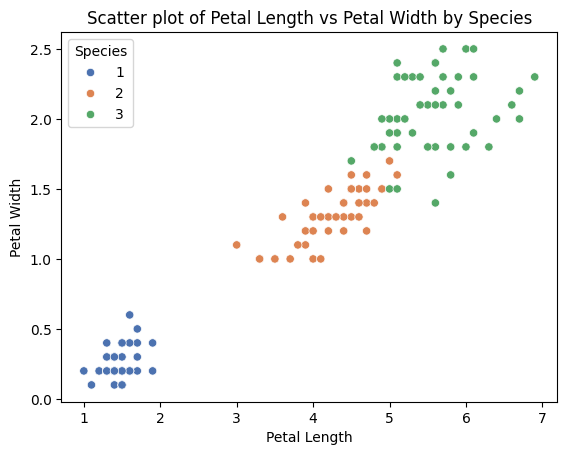

In [9]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', data=df, hue='Species', palette='deep')

# Add labels and title
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Scatter plot of Petal Length vs Petal Width by Species')

# Show the plot
plt.show()

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

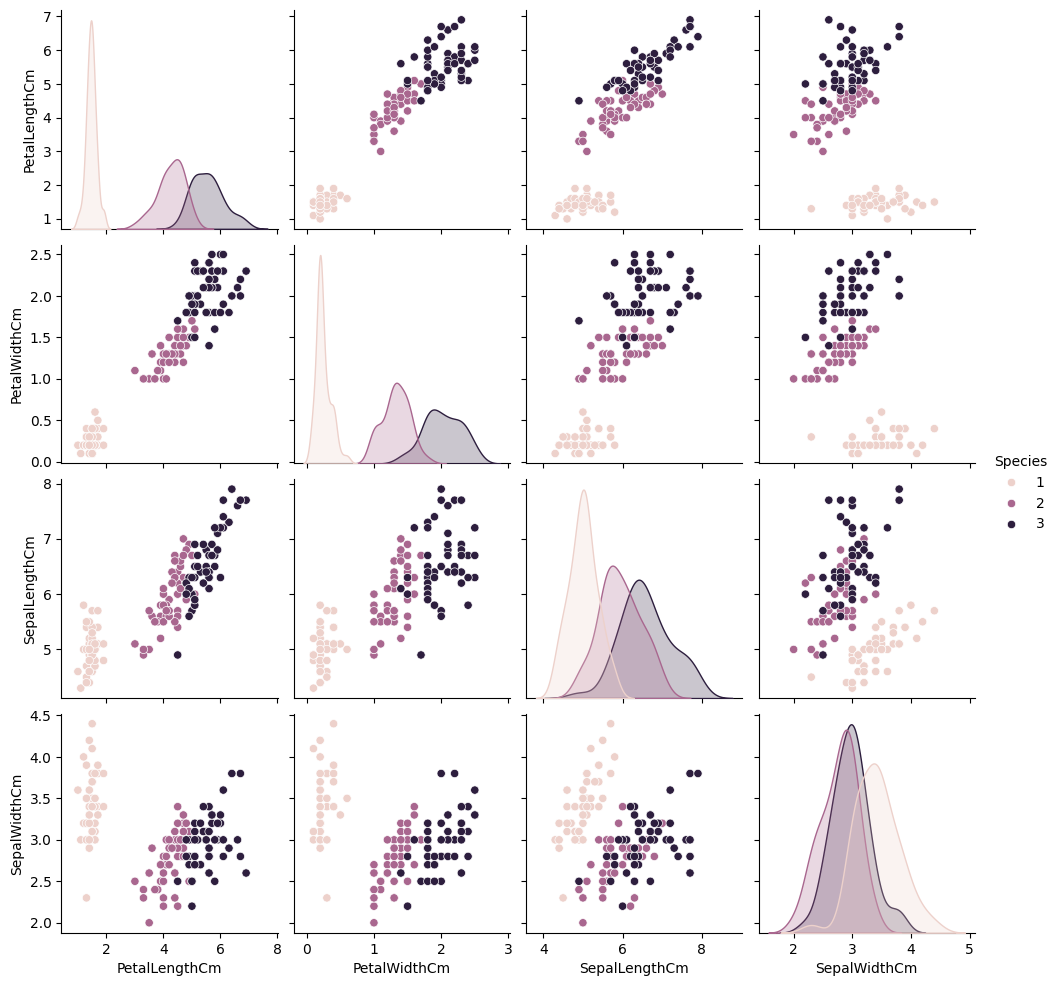

In [10]:
# Get dataframes for each real cluster
sns.pairplot(df[['PetalLengthCm', 'PetalWidthCm', 'SepalLengthCm', 'SepalWidthCm', 'Species']], hue='Species')

# Display the pair plot
plt.show()

Recall that for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [15]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
k=3
km=KMeans(n_clusters=k, n_init="auto")
# Do K-means clustering (assing each point in the dataset to a cluster)

km.fit(df)

# Print estimated cluster of each point in the dataset
print(km.labels_)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


NOTE: the lables of the estimated clusters do not agree with the lables in the real labels, therefore, it will be important to pair the labels of the real and estimated clusters

In [20]:
# Manual pairing the labels of the real and estimated clusters
# Add a new column to the dataset with the cluster information
# Laber of the estimated clusters
# Cluster centroides
# Sum of squared error (sse) of the final model
# The number of iterations required to converge

# Initialize and fit KMeans

# Get the estimated cluster labels
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
k=3
km=KMeans(n_clusters=k, n_init="auto")
# Do K-means clustering (assing each point in the dataset to a cluster)

km.fit(df)

# Print estimated cluster of each point in the dataset
print(km.labels_)

# Print the dataset with the new 'EstimatedCluster' column
print("Dataset with Cluster Information:")
print(df)

# Retrieve cluster centroids
centroids = km.cluster_centers_
print("\nCluster Centroids:")
print(centroids)

# Calculate Sum of Squared Error (SSE)
sse = km.inertia_
print("\nSum of Squared Error (SSE):", sse)

# Retrieve the number of iterations required to converge
iterations = km.n_iter_
print("\nNumber of Iterations to Converge:", iterations)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Dataset with Cluster Information:
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species  \
0      1            5.1           3.5            1.4           0.2        1   
1      2            4.9           3.0            1.4           0.2        1   
2      3            4.7           3.2            1.3           0.2        1   
3      4            4.6           3.1            1.5           0.2        1   
4      5            5.0           3.6            1.4           0.2        1   
..   ...            ...           ...            ...           ...      ...   
145  146            6.7           3.0            5.2           2.3        3   
146  147            6.3     

In [ ]:
# Add a new column to the dataset with the cluster information


In [ ]:
# Laber of the estimated clusters


In [ ]:
# Cluster centroides



In [ ]:
# Sum of squared error (sse) of the final model


In [ ]:
# The number of iterations required to converge


<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the numer in each cluster is random

# Plot estimated clusters

Plot estimated clusters

## Plot both real and estimated clusters to check for errors

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [21]:
# Intialize a list to hold sum of squared error (sse)
from sklearn.cluster import KMeans

# Define number of clusters
k=2
km=KMeans(n_clusters=k, n_init="auto")
# Do K-means clustering (assing each point in the dataset to a cluster)

km.fit(df)

# Print estimated cluster of each point in the dataset
print(km.labels_)

# Print the dataset with the new 'EstimatedCluster' column
print("Dataset with Cluster Information:")
print(df)

# Retrieve cluster centroids
centroids = km.cluster_centers_
print("\nCluster Centroids:")
print(centroids)

# Calculate Sum of Squared Error (SSE)
sse = km.inertia_
print("\nSum of Squared Error (SSE):", sse)

# Retrieve the number of iterations required to converge
iterations = km.n_iter_
print("\nNumber of Iterations to Converge:", iterations)
# Define values of k


# For each k



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
Dataset with Cluster Information:
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species  \
0      1            5.1           3.5            1.4           0.2        1   
1      2            4.9           3.0            1.4           0.2        1   
2      3            4.7           3.2            1.3           0.2        1   
3      4            4.6           3.1            1.5           0.2        1   
4      5            5.0           3.6            1.4           0.2        1   
..   ...            ...           ...            ...           ...      ...   
145  146            6.7           3.0            5.2           2.3        3   
146  147            6.3     

In [ ]:
# Plot sse versus k


Choose the k after which the sse is minimally reduced


<span style='color:Blue'> **Important remarks**  </span>

- Note that for K=2 ...
- Note that for K=3 ...



# Final remarks

- The number of each cluster need to be assigned assigned

- The order of the number in each cluster is random

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k